In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)
import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

# 서울시 구별 cctv 현황 분석

### 1. 데이터 분석

+ https://opengov.seoul.go.kr/data/11124500
            --CCTV 현황
            
+ https://data.seoul.go.kr/dataList/419/S/2/datasetView.do
            --서울시 인구

In [5]:
#### CCTV 자료

cctv_seoul = pd.read_csv("data/seoul/cctv.csv")
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [6]:
#### 인구 자료

pop_seoul = pd.read_excel("data/seoul/Report.xls" ,usecols="B,D,G,J,N",header=2) # usecols 사용할 컬럼들.만
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752


# 2.EDA & Preprocessing

#### 2-1.컬럼 이름 변경

In [7]:
#### CCTV 자료에서 "기관명"이라는 컬럼을 "구별"로 변경

cctv_seoul.rename(columns = {"기관명": "자치구"}, inplace = True)

cctv_seoul.head()

,자치구,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [8]:
##### 인구 수 자료에서 컬럼명을 각각 구별,인구수,한국인,외국인,고령자로 변경


pop_seoul.columns=['자치구','인구수','한국인','외국인','고령자']
pop_seoul.head()


,자치구,인구수,한국인,외국인,고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752


## 2-2 cctv 현황 검색

+ 어느 구가 cctv가 많이 설치 되어있는가? 또는 가장 적게 설치 되어있는가?

In [9]:
#cctv_seoul.sort_values(by="구별")[["구별","소계"]].iloc[:,:2]
#cctv_seoul.sort_values("소계", ascending = False)[["구별", "소계"]].iloc[[0]]
cctv_seoul.sort_values("소계", ascending=False)[["자치구", "소계"]]


,자치구,소계
0,강남구,3238
18,양천구,2482
14,서초구,2297
4,관악구,2109
21,은평구,2108
20,용산구,2096
6,구로구,1884
10,동대문구,1870
16,성북구,1651
22,종로구,1619


In [10]:
#### cctv의 설치 증가율에 따라 가장 높은 구와 가장 낮은 구를 탐색
#### cctv 의 설치 연도별 증가율을 구해서 "최고 증가율" 파생변수 추가

cctv_seoul["최근증가율"] = ((cctv_seoul["2014년"] + cctv_seoul["2015년"]+\
                        cctv_seoul ["2016년"])/ cctv_seoul ["2013년도 이전"])*100
                       
cctv_seoul.head()
                       

cctv_seoul.sort_values(by="최근증가율", ascending=False).head(25)

# by = 만 높은순으로 정렬해줌.

,자치구,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765
19,영등포구,1277,495,214,195,373,157.979798
0,강남구,3238,1292,430,584,932,150.619195
4,관악구,2109,846,260,390,613,149.290780
23,중구,1023,413,190,72,348,147.699758
11,동작구,1302,544,341,103,314,139.338235


## 2-3 인구수 탐색

+ 어느 구가 가장 인구수가 작은가?

In [11]:
# 필요없는 행 삭제(서울시 전체 합계 삭제), drop, del



pop_seoul.drop([0],inplace=True)

pop_seoul

,자치구,인구수,한국인,외국인,고령자
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752
5,광진구,371671,357149,14522,44470
6,동대문구,364962,349308,15654,56284
7,중랑구,411552,406868,4684,59992
8,성북구,453902,442226,11676,66896
9,강북구,327511,323862,3649,57002
10,도봉구,345041,342861,2180,54293


In [12]:
######### 구별 데이터의 중복이나 결측치 확인 등을 확인 dropna()

print(len(pop_seoul["자치구"].unique()))

print(pop_seoul["자치구"].count())

pop_seoul[pop_seoul["자치구"].isnull()] # 결측치 26번째 에있다는걸 찾아줌

26
25


,자치구,인구수,한국인,외국인,고령자
26,NaN,0,0,0,0


In [13]:
##### 결측치 삭제


pop_seoul.dropna()

pop_seoul.drop([26], inplace=True) # 26번째 행 드랍

print(len(pop_seoul["자치구"].unique()))

pop_seoul[pop_seoul["자치구"].isnull()]


25


,자치구,인구수,한국인,외국인,고령자


In [14]:
#### 단순히 인구수만 검색 (전체,외국인,고령자)
#.sort_values(by="정렬시킬것" ascending 순서대로) 정렬 기능


print(pop_seoul.sort_values(by="인구수", ascending=True).head())
print(pop_seoul.sort_values(by="인구수", ascending=False).head())

print("-------------------------------------------------------------")

print(pop_seoul.sort_values(by="외국인", ascending=True).head())
print(pop_seoul.sort_values(by="외국인", ascending=False).head())

print("-------------------------------------------------------------")

print(pop_seoul.sort_values(by="고령자", ascending=True).head())
print(pop_seoul.sort_values(by="고령자", ascending=False).head())

    자치구     인구수     한국인    외국인    고령자
2    중구  135139  126082   9057  21655
1   종로구  164348  154549   9799  26429
3   용산구  245411  229909  15502  37238
18  금천구  253344  234238  19106  34640
4   성동구  314551  306532   8019  41752
    자치구     인구수     한국인    외국인    고령자
24  송파구  671994  665282   6712  77978
16  강서구  608361  601696   6665  77381
23  강남구  557865  552976   4889  65859
11  노원구  555803  551902   3901  75081
21  관악구  522292  504445  17847  70807
-------------------------------------------------------------
    자치구     인구수     한국인   외국인    고령자
10  도봉구  345041  342861  2180  54293
9   강북구  327511  323862  3649  57002
15  양천구  473087  469221  3866  56070
11  노원구  555803  551902  3901  75081
25  강동구  438225  434027  4198  56983
     자치구     인구수     한국인    외국인    고령자
19  영등포구  403988  369128  34860  54704
17   구로구  440396  408369  32027  59838
18   금천구  253344  234238  19106  34640
21   관악구  522292  504445  17847  70807
6   동대문구  364962  349308  15654  56284
--------------------------

In [15]:
##### 전체 인구 대비 외국인, 고령자 비율 파생변수를 추가해서 순위 확인

pop_seoul["외국인비율"] = pop_seoul["외국인"] / pop_seoul["인구수"] *100
pop_seoul["고령자비율"] = pop_seoul["고령자"] / pop_seoul["인구수"] *100




In [16]:
pop_seoul

print(pop_seoul.sort_values(by="고령자비율", ascending=True).head())
print(pop_seoul.sort_values(by="고령자비율", ascending=False).head())


print(pop_seoul.sort_values(by="외국인비율", ascending=True).head())
print(pop_seoul.sort_values(by="외국인비율", ascending=False).head())

    자치구     인구수     한국인    외국인    고령자     외국인비율      고령자비율
24  송파구  671994  665282   6712  77978  0.998818  11.603973
23  강남구  557865  552976   4889  65859  0.876377  11.805544
15  양천구  473087  469221   3866  56070  0.817186  11.851943
5   광진구  371671  357149  14522  44470  3.907219  11.964883
22  서초구  445164  440954   4210  54055  0.945719  12.142716
     자치구     인구수     한국인    외국인    고령자     외국인비율      고령자비율
9    강북구  327511  323862   3649  57002  1.114161  17.404606
1    종로구  164348  154549   9799  26429  5.962348  16.081121
2     중구  135139  126082   9057  21655  6.701988  16.024242
10   도봉구  345041  342861   2180  54293  0.631809  15.735231
6   동대문구  364962  349308  15654  56284  4.289214  15.421880
    자치구     인구수     한국인   외국인    고령자     외국인비율      고령자비율
10  도봉구  345041  342861  2180  54293  0.631809  15.735231
11  노원구  555803  551902  3901  75081  0.701867  13.508563
15  양천구  473087  469221  3866  56070  0.817186  11.851943
23  강남구  557865  552976  4889  65859  0.876377  11.805

## 2-4 인구대비 cctv 설치 현황

In [17]:
##### CCTV 데이터와 인구 수 데이터를 합치기


data_result = pd.merge(cctv_seoul,pop_seoul,on="자치구")

data_result.head()

,자치구,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,557865,552976,4889,65859,0.876377,11.805544
1,강동구,1010,379,99,155,377,166.490765,438225,434027,4198,56983,0.957955,13.003138
2,강북구,831,369,120,138,204,125.203252,327511,323862,3649,57002,1.114161,17.404606
3,강서구,911,388,258,184,81,134.793814,608361,601696,6665,77381,1.095567,12.719586
4,관악구,2109,846,260,390,613,149.290780,522292,504445,17847,70807,3.417054,13.556976


In [18]:
#### 필요없는 컬럼 제거

del data_result["2013년도 이전"]
del data_result["2014년"]
del data_result["2015년"]
del data_result["2016년"]

In [19]:
data_result.head()

,자치구,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544
1,강동구,1010,166.490765,438225,434027,4198,56983,0.957955,13.003138
2,강북구,831,125.203252,327511,323862,3649,57002,1.114161,17.404606
3,강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586
4,관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976


In [20]:

data_result.set_index("자치구", inplace=True ) # 인덱스로 설정 자치구를 set_index

In [21]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544
강동구,1010,166.490765,438225,434027,4198,56983,0.957955,13.003138
강북구,831,125.203252,327511,323862,3649,57002,1.114161,17.404606
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586
관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976


In [22]:
#### CCTV의 갯수(소계)와 인구 데이터 중 어느 변수가 관계가 있는지를 확인

#### np.corrcoef() np.corrcoef 관계변수

print(np.corrcoef(data_result["고령자비율"],data_result["소계"])) # 고령자비율 하고 cctv갯수랑 관련있는지
print(np.corrcoef(data_result["외국인비율"],data_result["소계"])) # 외국인비율 하고 cctv갯수랑 관련있는지
print(np.corrcoef(data_result["인구수"],data_result["소계"]))     # 인구수 하고 cctv갯수랑 관련있는지



[[ 1.         -0.26783452]
 [-0.26783452  1.        ]]
[[ 1.         -0.04656978]
 [-0.04656978  1.        ]]
[[1.         0.23037183]
 [0.23037183 1.        ]]


In [23]:
#### 중간 체크 포인트 저장

data_result.to_csv("data/seoul/cctv_result.csv",sep=",",encoding="utf-8")

In [24]:

#### 파일 불러오기

data_result = pd.read_csv("data/seoul/cctv_result.csv",index_col="자치구")
data_result

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544
강동구,1010,166.490765,438225,434027,4198,56983,0.957955,13.003138
강북구,831,125.203252,327511,323862,3649,57002,1.114161,17.404606
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586
관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976
광진구,878,53.228621,371671,357149,14522,44470,3.907219,11.964883
구로구,1884,64.973730,440396,408369,32027,59838,7.272319,13.587317
금천구,1348,100.000000,253344,234238,19106,34640,7.541525,13.673109
노원구,1566,188.929889,555803,551902,3901,75081,0.701867,13.508563


# 3.Visualization

#### 3-1 cctv가 많이 설치된 구 확인

<AxesSubplot:xlabel='자치구'>

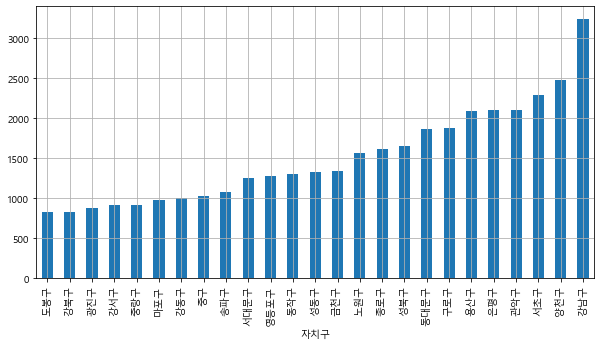

In [25]:
#data_result["소계"].plot(kind="bar")
#data_result["소계"].plot.bar()

data_result["소계"].sort_values().plot(kind="bar", figsize=(10,5),grid=True) 
# kind 막대기종류 figsize 크기
# sort_values()

#### 3-1.인구 대비 cctv 개수 확인

In [24]:
#### "CCTV비율" 파생 변수 추가(소계/인구수*100)

data_result["CCTV비율"] = data_result["소계"]/data_result["인구수"]*100
data_result

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
자치구,,,,,,,,,
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544,0.580427
강동구,1010,166.490765,438225,434027,4198,56983,0.957955,13.003138,0.230475
강북구,831,125.203252,327511,323862,3649,57002,1.114161,17.404606,0.253732
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586,0.149747
관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976,0.403797
광진구,878,53.228621,371671,357149,14522,44470,3.907219,11.964883,0.236230
구로구,1884,64.973730,440396,408369,32027,59838,7.272319,13.587317,0.427797
금천구,1348,100.000000,253344,234238,19106,34640,7.541525,13.673109,0.532083
노원구,1566,188.929889,555803,551902,3901,75081,0.701867,13.508563,0.281755


<AxesSubplot:ylabel='자치구'>

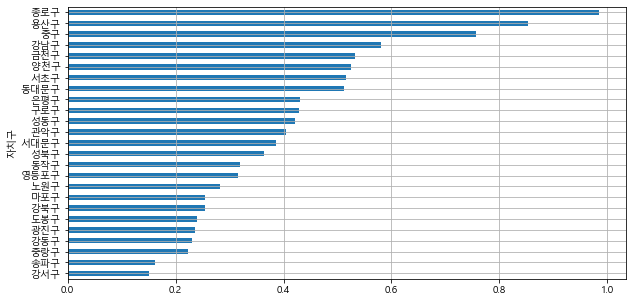

In [25]:

#data_result["CCTV비율"].sort_values(ascending=False).head(25)
data_result["CCTV비율"].sort_values().plot(kind="barh", figsize=(10,5),grid=True) 

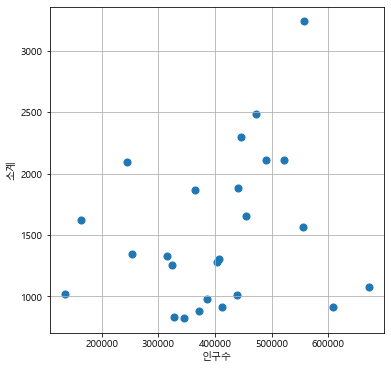

In [26]:
##### CCTV 개수와 인구 수가 서로 관계가 있는지 산포도 확인

plt.figure(figsize=(6,6))
plt.scatter(data_result["인구수"],data_result["소계"] ,s=50) # s는 점크기
plt.xlabel("인구수")
plt.ylabel("소계")
plt.grid()

In [27]:
#### 회귀선 작성(y= wx+ b)

[1.10432363e-03 1.06864009e+03]
 
0.001104 x + 1069


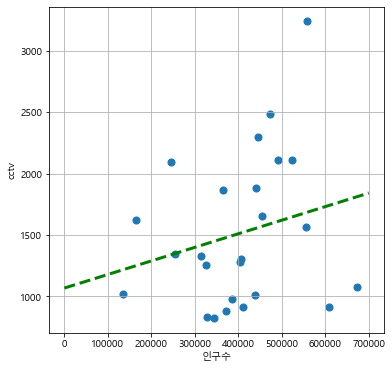

In [28]:

# np.polyfit 기울기 y절편
# np,polt1d  1차방정식


# 기울기와 절편

fp1= np.polyfit(data_result["인구수"],data_result["소계"],1)
print(fp1)


#방정식
f1 = np.poly1d(fp1)
print(f1)




fx= np.linspace(0,700000,100) # 0부터 700000까지 100구간으로 나눔 [1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ] 1부터2까지를 10구간

plt.figure(figsize=(6,6))
plt.scatter(data_result["인구수"],data_result["소계"] ,s=50) # s는 점크기
#plt.plot(fx,fp1[0]*fx+fp1[1])
plt.plot(fx,f1(fx),lw=3,color="g",ls="dashed")
plt.xlabel("인구수")
plt.ylabel("cctv")
plt.grid()

In [29]:
##### 각 데이터의 오차를 구해서 "오차"라는 파생 변수를 추가

data_result["오차"] = np.abs(data_result["소계"]- f1(data_result["인구수"]))

In [30]:
df_sort = data_result.sort_values(by="오차",ascending=False)
df_sort

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
자치구,,,,,,,,,,
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544,0.580427,1553.296412
양천구,2482,34.671731,473087,469221,3866,56070,0.817186,11.851943,0.524639,890.918761
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586,0.149747,829.467513
용산구,2096,53.216374,245411,229909,15502,37238,6.316750,15.173729,0.854077,756.346747
서초구,2297,63.371266,445164,440954,4210,54055,0.945719,12.142716,0.515990,736.754790
송파구,1081,104.347826,671994,665282,6712,77978,0.998818,11.603973,0.160865,729.738939
도봉구,825,246.638655,345041,342861,2180,54293,0.631809,15.735231,0.239102,624.677016
중랑구,916,79.960707,411552,406868,4684,59992,1.138131,14.577016,0.222572,607.126685
광진구,878,53.228621,371671,357149,14522,44470,3.907219,11.964883,0.236230,601.085154


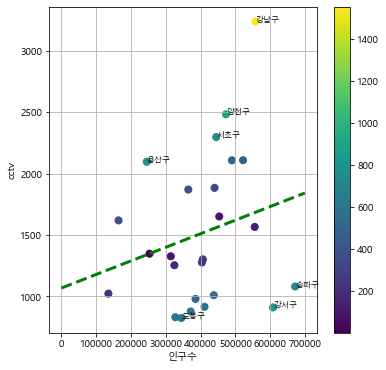

In [31]:
plt.figure(figsize=(6,6))
plt.scatter(data_result["인구수"],data_result["소계"] ,s=50 ,c=data_result["오차"]) # s는 점크기
plt.plot(fx,f1(fx),lw=3,color="g",ls="dashed")

plt.xlabel("인구수")
plt.ylabel("cctv")
plt.grid()
plt.colorbar()

for n in range(7):
    plt.text(df_sort["인구수"][n],df_sort["소계"][n],df_sort.index[n],fontsize=8)

In [33]:
##### 최종 결과물 파일로 저장

df_sort.to_csv("data/seoul/cctv_result.csv", sep=",", encoding="utf-8")